In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('/content/Employee.csv')

# Display the first few rows
data.head()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
# Summary statistics
data.describe()

# Data types and missing values
data.info()

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [4]:
# Fill missing values with mode (categorical) or median (numerical)
for column in data.columns:
    if data[column].dtype == "object":
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Verify no missing values remain
missing_values_after = data.isnull().sum()
print(missing_values_after)


Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64


In [5]:
# def detect_outliers_iqr(df, columns):
#   Q1 = df[columns].quantile(0.25)
#   Q3 = df[columns].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)].any(axis=1)
#   return outliers

In [6]:
# outlier_cols = df.select_dtypes(exclude='object').columns
# outlier_cols

In [7]:
# plt.figure(figsize=(20,10))
# for i, col in enumerate(outlier_cols):
#   plt.subplot(3,3,i+1)
#   sns.boxplot(df[col])
# plt.show()

In [8]:
# for col in outlier_cols:
#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - (1.5 * IQR)
#   upper_bound = Q3 + (1.5 * IQR)
#   df[col] = np.where(df[col] < lower_bound,lower_bound,df[col])
#   df[col] = np.where(df[col] > upper_bound,upper_bound,df[col])

In [9]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save the encoder for each column

# Verify the encoding
data.head()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2.0,...,0.0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3.0,...,3.0,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0.0,...,3.0,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1.0,...,2.0,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0.0,...,0.0,2,1,68,0,0,0,1,2,1


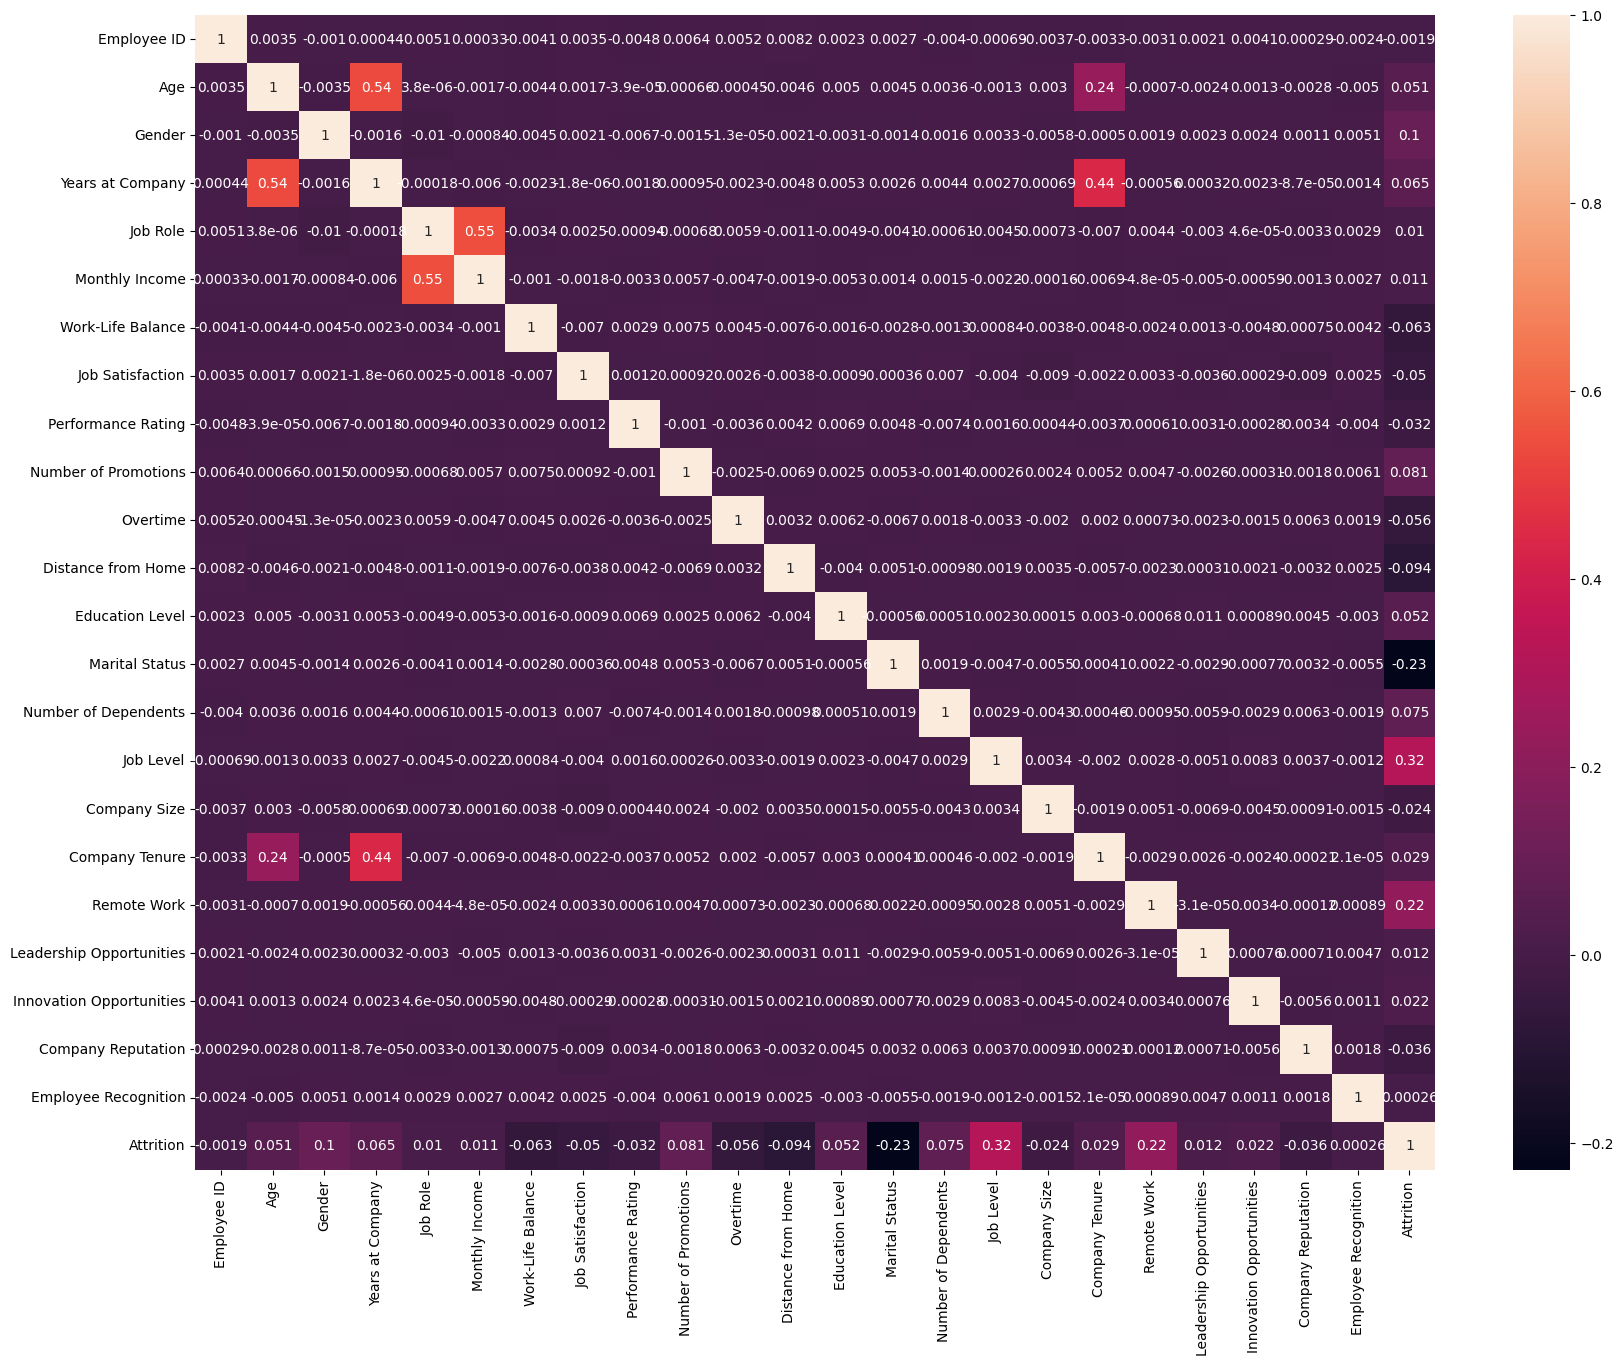

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

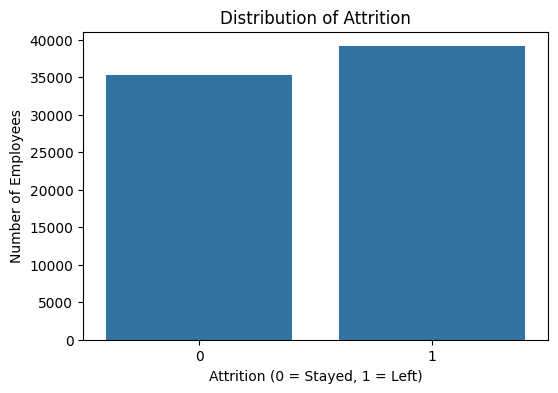

In [11]:
# Countplot of Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=data)
plt.title("Distribution of Attrition")
plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
plt.ylabel("Number of Employees")
plt.show()

In [12]:
# Define the target variable and features
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Initialize the model
log_model = LogisticRegression(random_state=42)

# Train the model
log_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")


Logistic Regression Results:
[[7349 3262]
 [3190 8549]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10611
           1       0.72      0.73      0.73     11739

    accuracy                           0.71     22350
   macro avg       0.71      0.71      0.71     22350
weighted avg       0.71      0.71      0.71     22350

Accuracy: 0.7113


In [15]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest Results:
[[7683 2928]
 [2894 8845]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73     10611
           1       0.75      0.75      0.75     11739

    accuracy                           0.74     22350
   macro avg       0.74      0.74      0.74     22350
weighted avg       0.74      0.74      0.74     22350

Accuracy: 0.7395


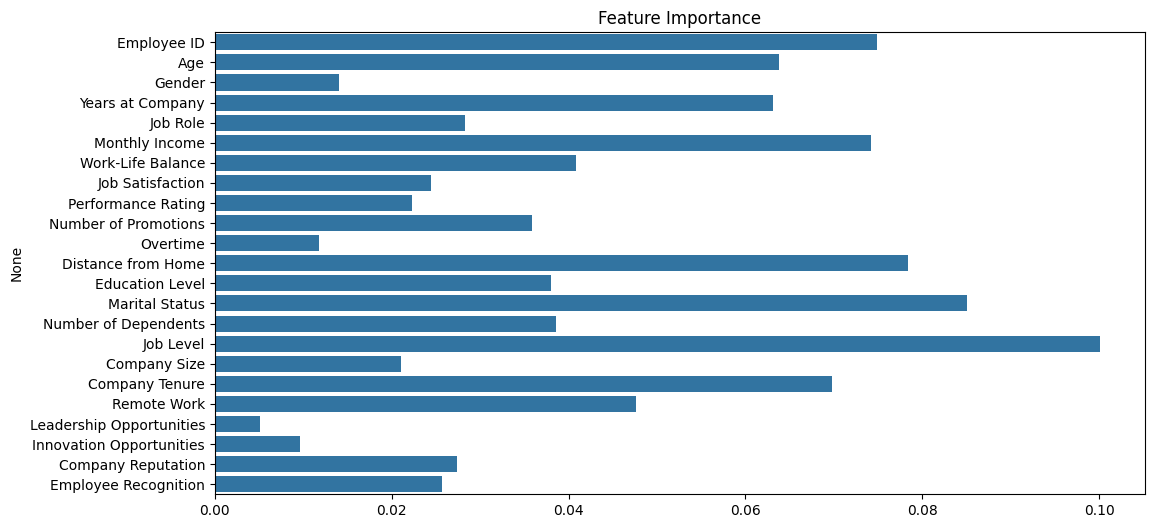

In [16]:
# Feature importance
importances = rf_model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

In [17]:
# Initialize the model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


SVM Results:
[[7531 3080]
 [2978 8761]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.71     10611
           1       0.74      0.75      0.74     11739

    accuracy                           0.73     22350
   macro avg       0.73      0.73      0.73     22350
weighted avg       0.73      0.73      0.73     22350

Accuracy: 0.7289


In [18]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")


Decision Tree Results:
[[6757 3854]
 [3739 8000]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64     10611
           1       0.67      0.68      0.68     11739

    accuracy                           0.66     22350
   macro avg       0.66      0.66      0.66     22350
weighted avg       0.66      0.66      0.66     22350

Accuracy: 0.6603


In [19]:
# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors Results:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")


K-Nearest Neighbors Results:
[[6864 3747]
 [3749 7990]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     10611
           1       0.68      0.68      0.68     11739

    accuracy                           0.66     22350
   macro avg       0.66      0.66      0.66     22350
weighted avg       0.66      0.66      0.66     22350

Accuracy: 0.6646


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution (same as GridSearchCV but with distributions instead of fixed values)
param_dist = {
    'n_estimators': np.arange(100, 301, 100),  #
    'max_depth': [None] + list(np.arange(10, 31, 10)),
    'min_samples_split': np.arange(2, 11, 3)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)


**Result : The best model selected is Random Forest with accuracy is 0.7395**